
# 🧠 K-Nearest Neighbours (KNN) — Zoo Dataset (Upgraded)
**Includes:** EDA, preprocessing, elbow method, GridSearchCV, full metrics, confusion matrix, and PCA-based decision boundaries.


## 1) Setup & Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Display options
pd.set_option('display.max_columns', None)


## 2) Load Data

In [3]:

df = pd.read_csv(r"D:\DATA-SCIENCE\ASSIGNMENTS\16 KNN\Zoo.csv")
print(df.shape)
df.head()


(101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 3) Exploratory Data Analysis

In [4]:

print("\nInfo:")
print(df.info())
print("\nDescribe:")
df.describe().T



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Describe:


,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


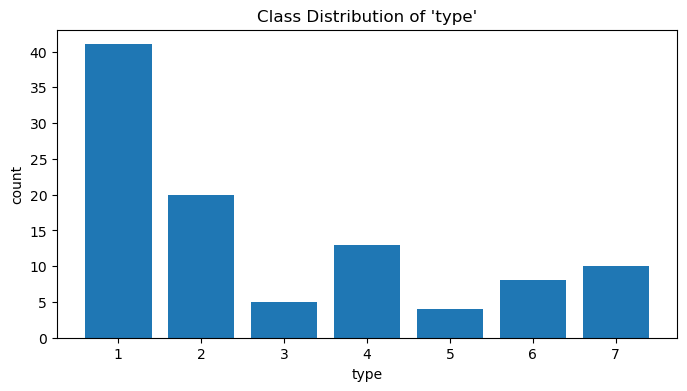

In [5]:

# Class distribution
counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Distribution of 'type'")
plt.xlabel("type")
plt.ylabel("count")
plt.show()


In [6]:

# Null checks
nulls = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", nulls)


Missing values per column:
 animal name    0
hair           0
catsize        0
domestic       0
tail           0
legs           0
fins           0
venomous       0
breathes       0
backbone       0
toothed        0
predator       0
aquatic        0
airborne       0
milk           0
eggs           0
feathers       0
type           0
dtype: int64


## 4) Preprocessing

In [7]:

# Drop non-feature identifier and separate features/target
X = df.drop(columns=['animal name', 'type'])
y = df['type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Scaling (critical for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3], y_train[:3].tolist()


(array([[-0.83793058, -0.5       ,  0.85972695, -0.83793058, -0.53881591,
         -0.73379939,  0.85972695, -1.22474487, -2.17124059, -2.        ,
         -0.33333333, -0.46056619, -1.37415526, -1.67616342, -0.37796447,
         -0.8819171 ],
        [-0.83793058, -0.5       ,  0.85972695, -0.83793058, -0.53881591,
         -0.73379939, -1.16316   , -1.22474487,  0.46056619,  0.5       ,
         -0.33333333, -0.46056619,  0.63374284,  0.59660054, -0.37796447,
          1.13389342],
        [-0.83793058,  2.        ,  0.85972695, -0.83793058,  1.85592145,
          1.36277029,  0.85972695, -1.22474487,  0.46056619,  0.5       ,
         -0.33333333, -0.46056619, -0.37020621,  0.59660054, -0.37796447,
         -0.8819171 ]]),
 [7, 3, 2])

## 5) Baseline KNN

Baseline metrics (k=5, metric=euclidean):
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0


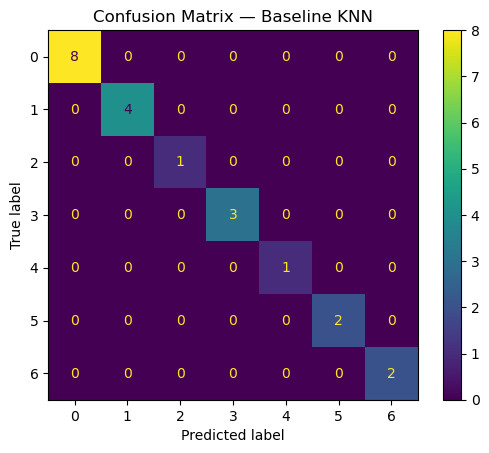

In [9]:

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Baseline metrics (k=5, metric=euclidean):")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix — Baseline KNN")
plt.show()


## 6) Elbow Method — Pick a Good k

Least-populated class in y_train: 3 samples
Using StratifiedKFold with n_splits=3
Best k by CV (Elbow using accuracy): 1


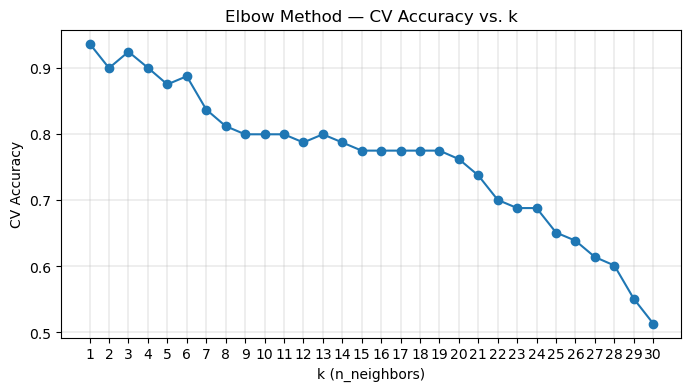

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Pick a safe n_splits: at most 5, but not more than the minority class count
min_class = y_train.value_counts().min()
safe_splits = max(2, min(5, min_class))  # at least 2

cv = StratifiedKFold(n_splits=safe_splits, shuffle=True, random_state=RANDOM_STATE)

k_values = list(range(1, 31))
cv_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k_elbow = k_values[int(np.argmax(cv_scores))]
print(f"Least-populated class in y_train: {min_class} samples")
print(f"Using StratifiedKFold with n_splits={safe_splits}")
print("Best k by CV (Elbow using accuracy):", best_k_elbow)

plt.figure(figsize=(8,4))
plt.plot(k_values, cv_scores, marker='o')
plt.title("Elbow Method — CV Accuracy vs. k")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV Accuracy")
plt.xticks(k_values)
plt.grid(True, linewidth=0.3)
plt.show()


## 7) Hyperparameter Tuning — GridSearchCV

In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from collections import Counter

# figure out the minimum class count in *y_train*
min_class = y_train.value_counts().min()
safe_splits = max(2, min(5, min_class))  # at least 2, at most 5 (and <= minority class)

cv = StratifiedKFold(n_splits=safe_splits, shuffle=True, random_state=RANDOM_STATE)

param_grid = {
    'n_neighbors': list(range(max(1, best_k_elbow-5), best_k_elbow+6)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],  # used only when metric='minkowski'
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=None,
    verbose=0
)

gs.fit(X_train_scaled, y_train)

print(f"Least-populated train class: {min_class}; using n_splits={safe_splits}")
print("Best params :", gs.best_params_)
print("Best CV acc :", gs.best_score_)

best_knn = gs.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

print("\n=== Test Metrics (Best Model) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_best, average='weighted', zero_division=0))

print("\nHeads-up: if best_params_ shows metric='euclidean' or 'manhattan', the 'p' value is ignored.")


Least-populated train class: 3; using n_splits=3
Best params : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best CV acc : 0.949667616334283

=== Test Metrics (Best Model) ===
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Heads-up: if best_params_ shows metric='euclidean' or 'manhattan', the 'p' value is ignored.


## 8) Decision Boundaries via PCA (2D)


We reduce features to 2 principal components for visualization.  
A separate KNN is trained **on these 2D PCA features** (train/test split preserved) to plot clean decision regions.


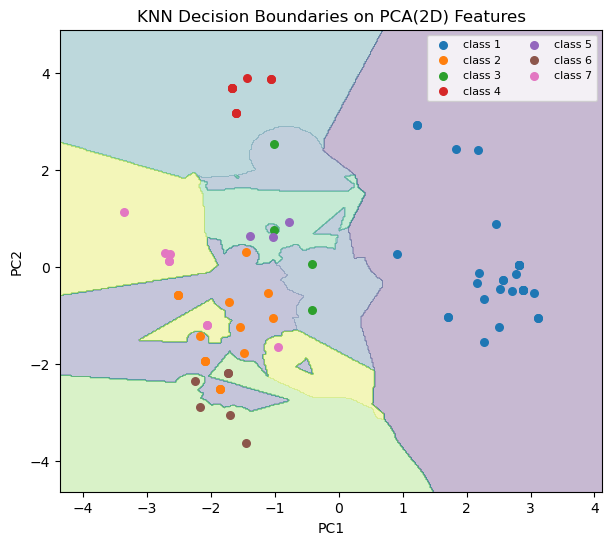

PCA-space KNN (for visualization) — Test Accuracy: 0.8095238095238095


In [15]:

# Fit PCA on training set (scaled), then transform both sets
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a KNN on 2D PCA features using best hyperparameters (only n_neighbors/weights/metric/p are used)
knn_pca = KNeighborsClassifier(
    n_neighbors=best_knn.get_params().get('n_neighbors', 5),
    weights=best_knn.get_params().get('weights', 'uniform'),
    metric=best_knn.get_params().get('metric', 'euclidean'),
    p=best_knn.get_params().get('p', 2)
)
knn_pca.fit(X_train_pca, y_train)

# Meshgrid for decision surface
x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,6))
# Decision regions (use imshow/contourf without specifying colors)
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
for cls in np.unique(y_train):
    idx = np.where(y_train == cls)[0]
    plt.scatter(X_train_pca[idx,0], X_train_pca[idx,1], label=f"class {cls}", s=30)

plt.title("KNN Decision Boundaries on PCA(2D) Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="best", fontsize=8, ncol=2)
plt.show()

# Report PCA model performance for context
y_pred_pca = knn_pca.predict(X_test_pca)
print("PCA-space KNN (for visualization) — Test Accuracy:", accuracy_score(y_test, y_pred_pca))


## 9) Interview Questions — Quick Answers


**Q1) Key hyperparameters in KNN?**  
- `n_neighbors` — number of neighbors (k)  
- `weights` — `'uniform'` or `'distance'`  
- `metric` — `'euclidean'`, `'manhattan'`, `'minkowski'`, etc.  
- `p` — Minkowski power (p=1 → Manhattan, p=2 → Euclidean)  
- `algorithm` — `'auto'`, `'brute'`, `'kd_tree'`, `'ball_tree'` (performance)  

**Q2) Distance metrics used in KNN?**  
- Euclidean, Manhattan, Minkowski  
- Hamming (categorical), Cosine (text/high-dim, with care)
